# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [5]:
df.rename({
    'GRADES_PK_G' : 'PK_ENROLLMENT',
    'GRADES_KG_G': 'KG_ENROLLMENT',
    'GRADES_4_G': '4TH_ENROLLMENT',
    'GRADES_8_G': '8TH_ENROLLMENT',
    'GRADES_12_G': '12TH_ENROLLMENT',
    'GRADES_1_8_G': '1ST-8TH_ENROLLMENT',
    'GRADES_9_12_G': '9TH-12TH_ENROLLMENT',
    'GRADES_ALL_G': 'TOTAL_ENROLLMENT'
},
axis=1, inplace=True
)

In [6]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,4TH_ENROLLMENT,8TH_ENROLLMENT,12TH_ENROLLMENT,1ST-8TH_ENROLLMENT,9TH-12TH_ENROLLMENT,TOTAL_ENROLLMENT,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


These next few blocks I'm just trying to get a feel for the data

In [12]:
df.shape

(1715, 25)

In [7]:
df["YEAR"].nunique

<bound method IndexOpsMixin.nunique of 0       1992
1       1992
2       1992
3       1992
4       1992
        ... 
1710    2019
1711    2019
1712    2019
1713    2019
1714    2019
Name: YEAR, Length: 1715, dtype: int64>

In [8]:
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
PK_ENROLLMENT                    173
KG_ENROLLMENT                     83
4TH_ENROLLMENT                    83
8TH_ENROLLMENT                    83
12TH_ENROLLMENT                   83
1ST-8TH_ENROLLMENT               695
9TH-12TH_ENROLLMENT              644
TOTAL_ENROLLMENT                  83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [11]:
# filling in enroll with total_enrollment because documentation says they're the same estimate and total_enrollment
# has less null values and because tutorial came to same conclusion
df["ENROLL"] = df["ENROLL"].fillna(df["TOTAL_ENROLLMENT"])


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: GRADE 8 MATH

How many years of data are logged in our dataset? 

In [18]:
print(df["YEAR"].max() - df["YEAR"].min())

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [83]:
score_diff = df[df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].max(
) - df[df['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE'].max()
if score_diff > 0:
    print("ohio")
elif score_diff < 0:
    print("michigan")
else:
    print('equal')


ohio


Find the average for your outcome score across all states in 2019

In [26]:
print(df[df['YEAR'] == 2019]['AVG_MATH_8_SCORE'].mean())
print(df[df['YEAR'] == 2019]['AVG_MATH_8_SCORE'].median())

281.2641509433962
282.0


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [84]:
print(df.groupby('STATE')['AVG_MATH_8_SCORE'].max())

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [31]:
df['TOTAL_REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE']/df['TOTAL_ENROLLMENT']
df['LOCAL_REVENUE_PER_STUDENT'] = df['LOCAL_REVENUE']/df['TOTAL_ENROLLMENT']
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE']/df['TOTAL_ENROLLMENT']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE']/df['TOTAL_ENROLLMENT']


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

I took some columns that I thought might have an affect on how states' education systems work, and I divided them per student
so that it accounts for the difference in numbers due to population.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot: title={'center': 'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

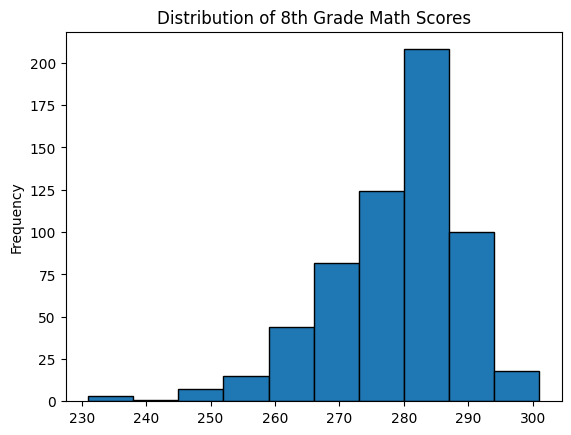

In [32]:
df.AVG_MATH_8_SCORE.plot.hist(
    title="Distribution of 8th Grade Math Scores", edgecolor="black")


**<CAPTION FOR VIZ 1>**
Wanted to see a distribution of scores to see if they're approximately normal. Looks like they're skewed a bit left.

**Visualization 2**

/home/kshashank/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, '8th Grade Math Score')

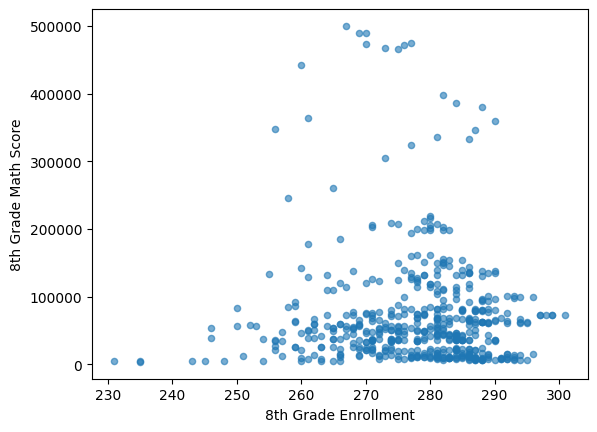

In [45]:
df.plot.scatter(y='8TH_ENROLLMENT', x='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Enrollment')
plt.ylabel('8th Grade Math Score')

**<CAPTION FOR VIZ 2>** We see from plotting math score against enrollment that the distribution is approximately normal,
so it doesn't seem to affect score much.

**Visualization 3**

/home/kshashank/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, '8th Grade Math Score')

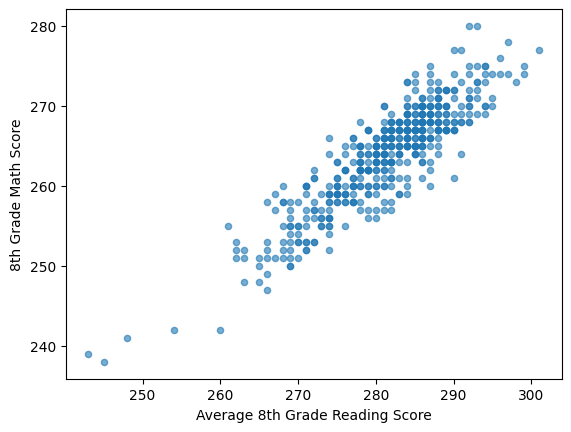

In [47]:
df.plot.scatter(y='AVG_READING_8_SCORE', x='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Average 8th Grade Reading Score')
plt.ylabel('8th Grade Math Score')

**<CAPTION FOR VIZ 3>** We see from plotting math score against reading score that the two are strongly correlated. 

**Visualization 4**

Text(0, 0.5, '8th Grade Math Score')

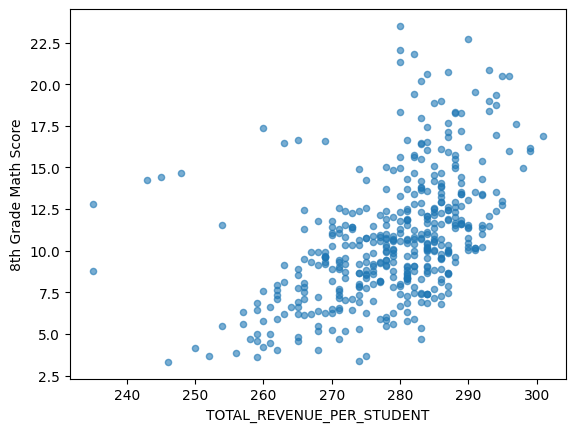

In [48]:
# df['TOTAL_REVENUE_PER_STUDENT']
# df['LOCAL_REVENUE_PER_STUDENT']
# df['TOTAL_EXPENDITURE_PER_STUDENT']
# df['INSTRUCTION_EXPENDITURE_PER_STUDENT']
df.plot.scatter(y='TOTAL_REVENUE_PER_STUDENT', x='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('TOTAL_REVENUE_PER_STUDENT')
plt.ylabel('8th Grade Math Score')

**<CAPTION FOR VIZ 4>** We see from plotting math score against total revenue per student that the two are very weakly correlated. We'll break down total revenue into its components and see which turns out to to be the most influential.

**Visualization 5**

Text(0, 0.5, '8th Grade Math Score')

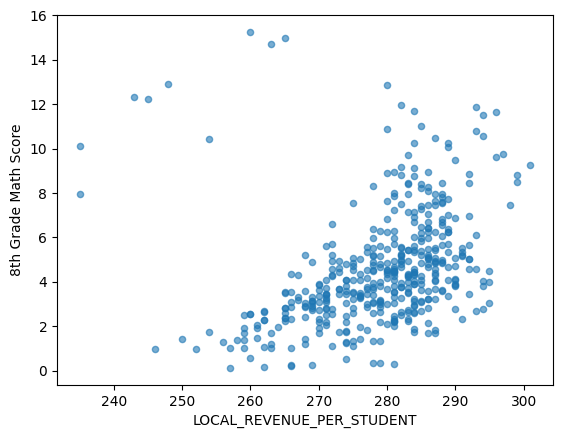

In [49]:
# df['TOTAL_REVENUE_PER_STUDENT']
# df['LOCAL_REVENUE_PER_STUDENT']
# df['TOTAL_EXPENDITURE_PER_STUDENT']
# df['INSTRUCTION_EXPENDITURE_PER_STUDENT']
df.plot.scatter(y='LOCAL_REVENUE_PER_STUDENT', x='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('LOCAL_REVENUE_PER_STUDENT')
plt.ylabel('8th Grade Math Score')

**<CAPTION FOR VIZ 5>** We see from plotting math score against local revenue per student that it is slightly stronger of a correlation. Let's see if the other components of total revenue are more influential.

**Visualization 6**

/home/kshashank/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, '8th Grade Math Score')

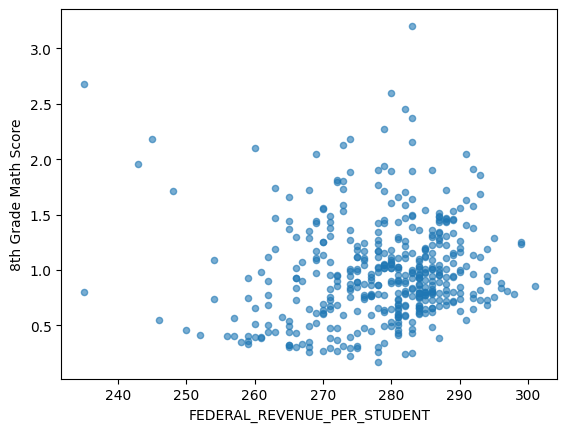

In [50]:
# df['TOTAL_REVENUE_PER_STUDENT']
# df['LOCAL_REVENUE_PER_STUDENT']
# df['TOTAL_EXPENDITURE_PER_STUDENT']
# df['INSTRUCTION_EXPENDITURE_PER_STUDENT']
df['FEDERAL_REVENUE_PER_STUDENT'] = df['FEDERAL_REVENUE']/df['TOTAL_ENROLLMENT']
df.plot.scatter(y='FEDERAL_REVENUE_PER_STUDENT',
                x='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('FEDERAL_REVENUE_PER_STUDENT')
plt.ylabel('8th Grade Math Score')

**<CAPTION FOR VIZ 6>** Federal revenue doesn't appear to be very influential

**Visualization 7**

/home/kshashank/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, '8th Grade Math Score')

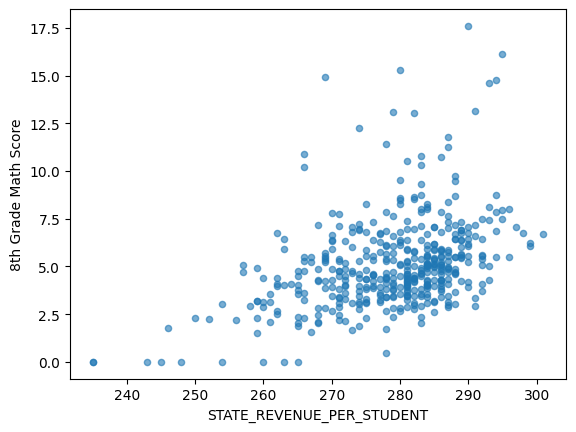

In [51]:
# df['TOTAL_REVENUE_PER_STUDENT']
# df['LOCAL_REVENUE_PER_STUDENT']
# df['TOTAL_EXPENDITURE_PER_STUDENT']
# df['INSTRUCTION_EXPENDITURE_PER_STUDENT']
df['STATE_REVENUE_PER_STUDENT'] = df['STATE_REVENUE']/df['TOTAL_ENROLLMENT']
df.plot.scatter(y='STATE_REVENUE_PER_STUDENT',
                x='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('STATE_REVENUE_PER_STUDENT')
plt.ylabel('8th Grade Math Score')

**<CAPTION FOR VIZ 7>** Of the 3 components of total revenue, it appears state is the most influential on 8 grade math scores, or at least, it appears to have the highest correlation.

**Visualization 8**
Let's similarly break down total expenditure

/home/kshashank/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, '8th Grade Math Score')

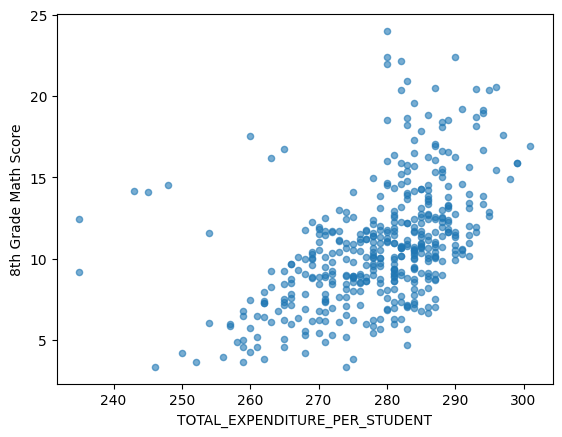

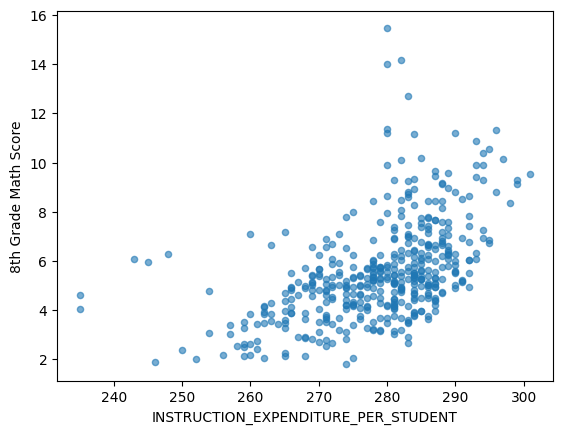

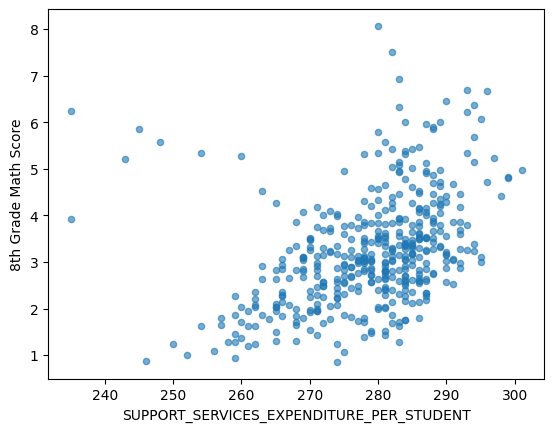

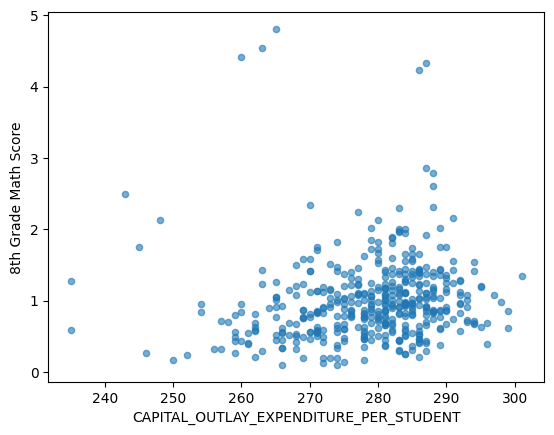

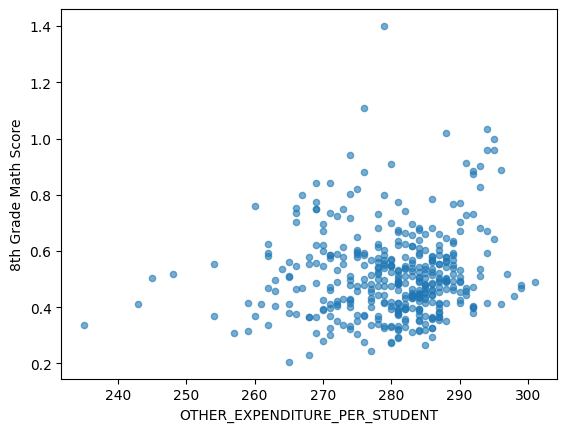

In [53]:
# df['TOTAL_EXPENDITURE_PER_STUDENT']
# df['INSTRUCTION_EXPENDITURE_PER_STUDENT']
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE']/df['TOTAL_ENROLLMENT']
df['CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT'] = df['CAPITAL_OUTLAY_EXPENDITURE']/df['TOTAL_ENROLLMENT']
df['OTHER_EXPENDITURE_PER_STUDENT'] = df['OTHER_EXPENDITURE']/df['TOTAL_ENROLLMENT']

df.plot.scatter(y='TOTAL_EXPENDITURE_PER_STUDENT',
                x='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('TOTAL_EXPENDITURE_PER_STUDENT')
plt.ylabel('8th Grade Math Score')

df.plot.scatter(y='INSTRUCTION_EXPENDITURE_PER_STUDENT',
                x='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('INSTRUCTION_EXPENDITURE_PER_STUDENT')
plt.ylabel('8th Grade Math Score')

df.plot.scatter(y='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',
                x='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT')
plt.ylabel('8th Grade Math Score')

df.plot.scatter(y='CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT',
                x='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT')
plt.ylabel('8th Grade Math Score')

df.plot.scatter(y='OTHER_EXPENDITURE_PER_STUDENT',
                x='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('OTHER_EXPENDITURE_PER_STUDENT')
plt.ylabel('8th Grade Math Score')

**<CAPTION FOR VIZ 7>** It looks like instruction expenditure and support service expenditure per student are the most highly correlated with 8th grade math scores. Let's look at the R^2 values for the factors we've determined might be most influential.

So far, the features I've found most interesting or most likely to affect 8th grade math scores are revenue per student (specifically local and state revenue) and expenditure per student (specifically instruction and support services). There is, of course, 8th grade reading scores and presumable 4th grade math or reading scores, but I'm going to ignore those since the goal is to find out which factors are likely to help a student succeed, and already being a strong student doesn't really give us an answer. That is to say, the things that affect high math scores in 8th grade are probably the same things causing high scores in other subjects and other ages in the same students, and those are the real factors we want to identify.

Let's run this feature selection algorithm I found online, to see whether my rudimentary exploration led anywhere. (Source: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b#:~:text=Feature%20Selection%20with%20sklearn%20and%20Pandas%201%201.,as%20evaluation%20criteria.%20...%203%203.%20Embedded%20Method)

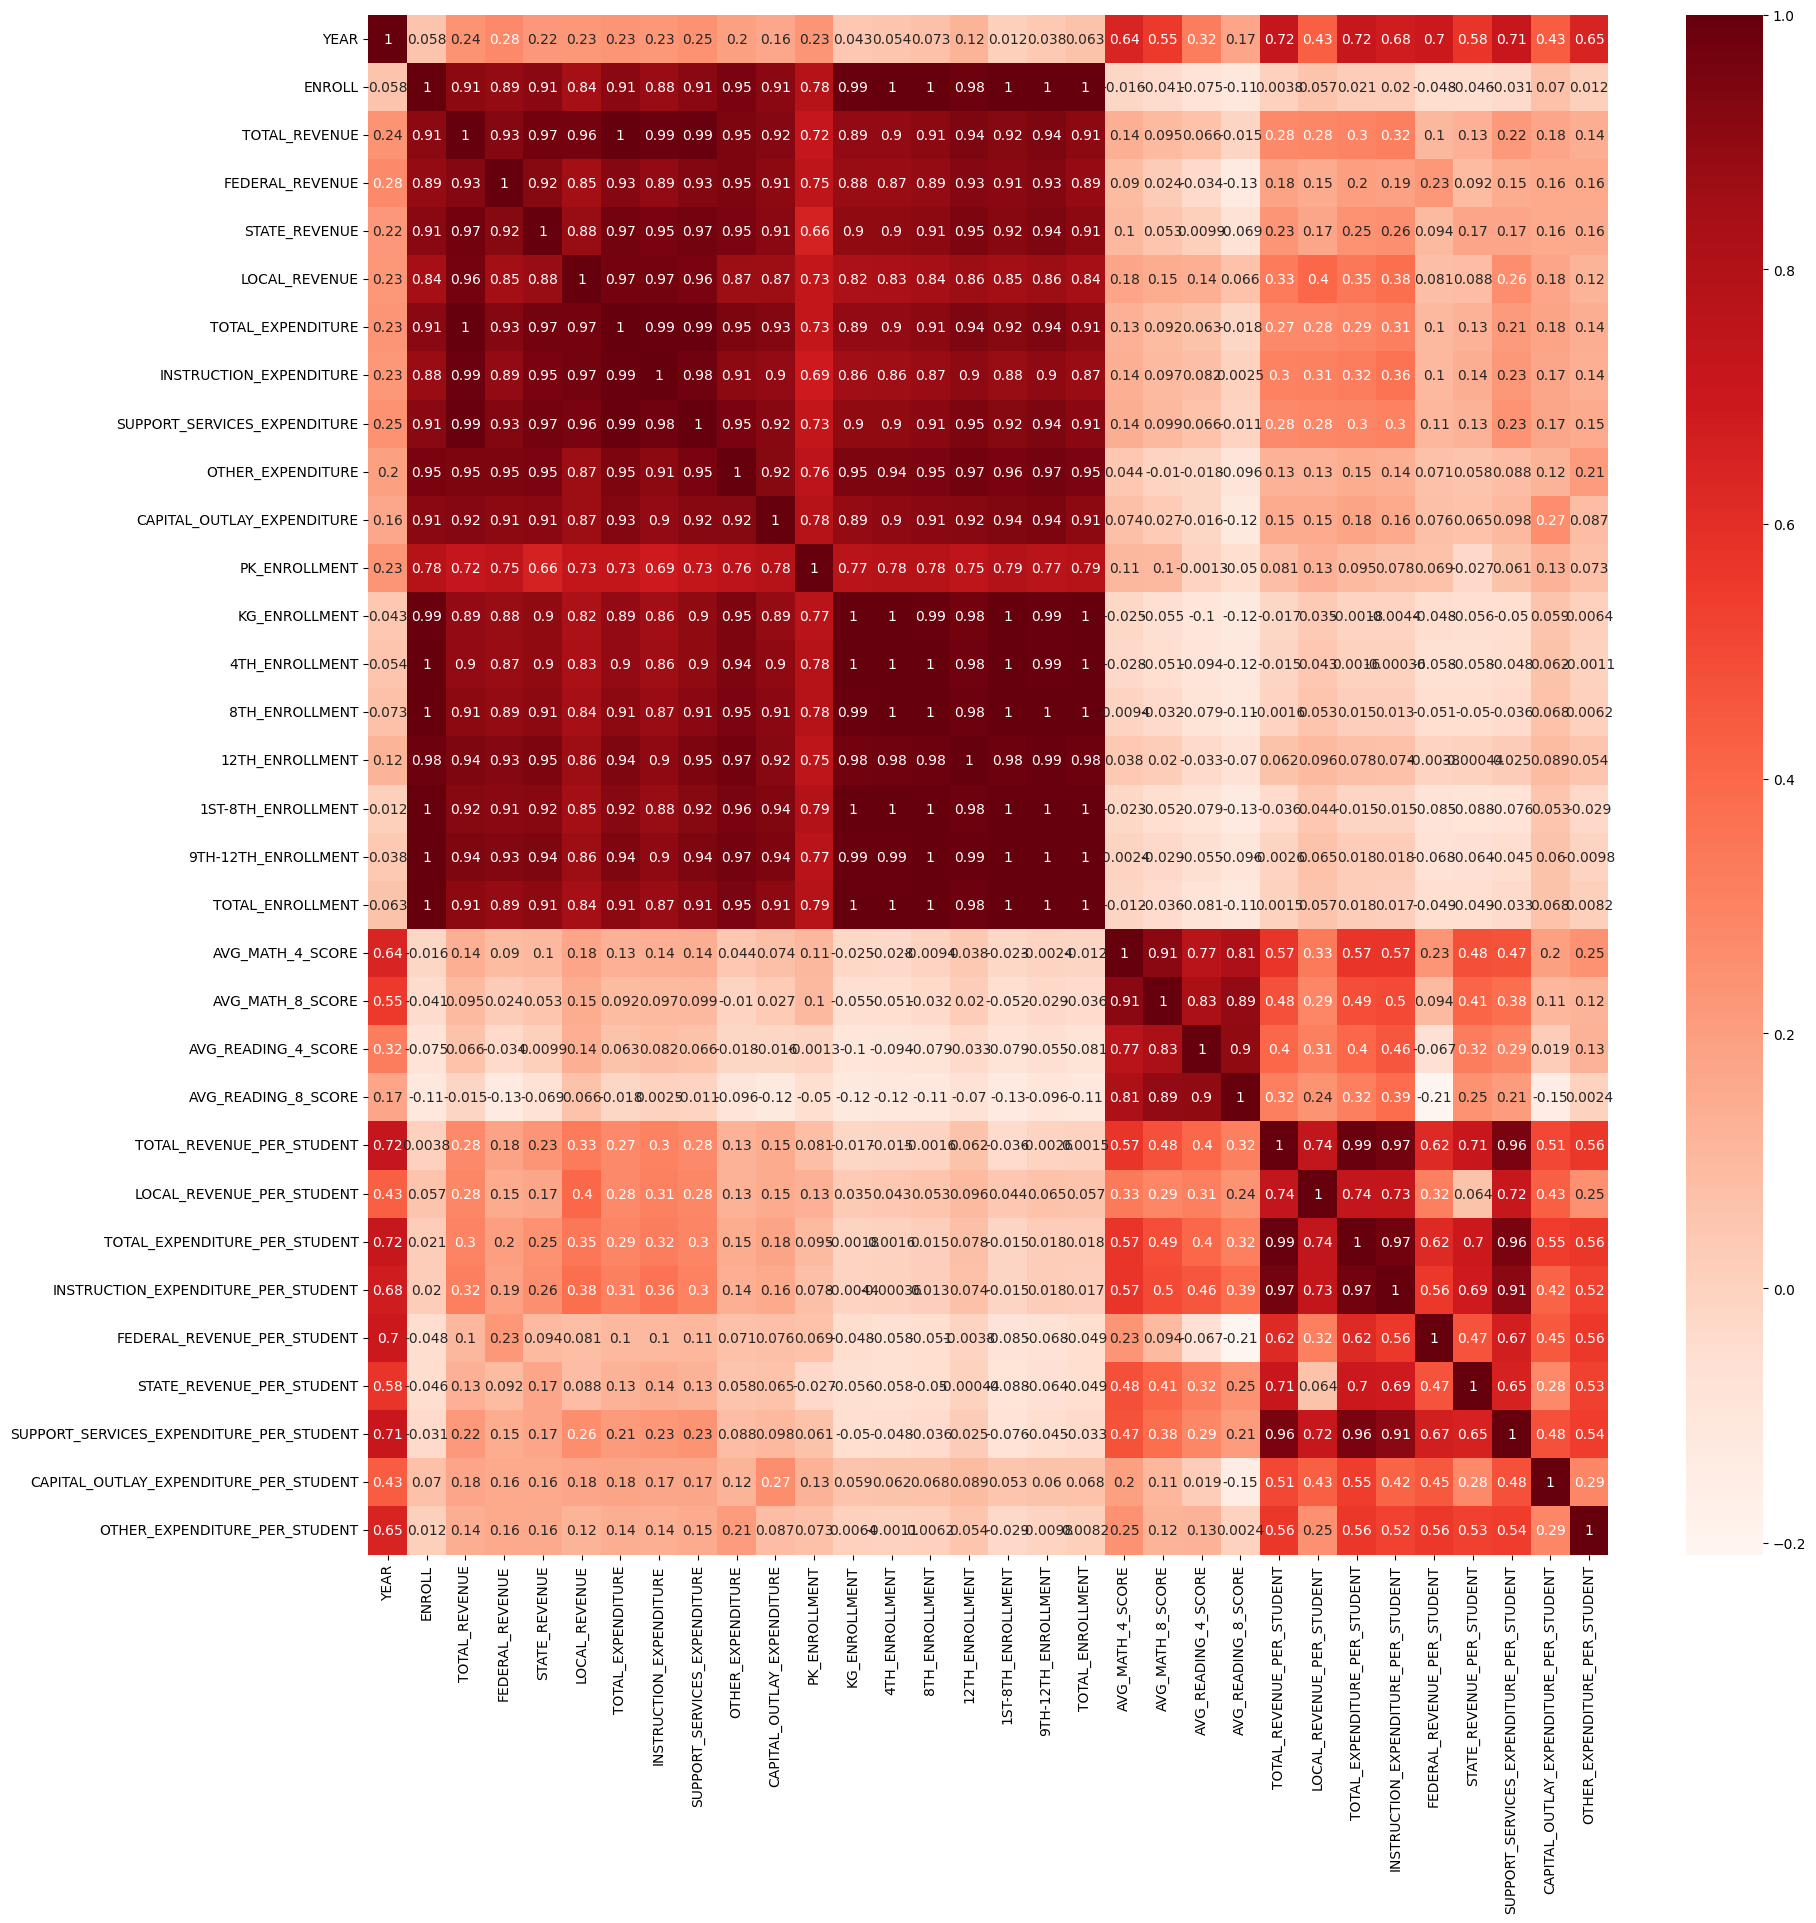

In [57]:
#Using Pearson Correlationa
import seaborn as sns
plt.figure(figsize=(20, 20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [59]:
#Correlation with output variable
cor_target = abs(cor["AVG_MATH_8_SCORE"])  # Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.5]
relevant_features

YEAR                                   0.552717
AVG_MATH_4_SCORE                       0.910409
AVG_MATH_8_SCORE                       1.000000
AVG_READING_4_SCORE                    0.825038
AVG_READING_8_SCORE                    0.892087
INSTRUCTION_EXPENDITURE_PER_STUDENT    0.503786
Name: AVG_MATH_8_SCORE, dtype: float64

It looks like we ended up with the situation we didn't want, where the highest correlated features were the other test scores, but it is good to see instruction expenditure per student up there. Let's drop our threshold and try again.

In [60]:
# Selecting highly correlated features
cor_target = abs(cor["AVG_MATH_8_SCORE"])
relevant_features = cor_target[cor_target > 0.3]
relevant_features


YEAR                                        0.552717
AVG_MATH_4_SCORE                            0.910409
AVG_MATH_8_SCORE                            1.000000
AVG_READING_4_SCORE                         0.825038
AVG_READING_8_SCORE                         0.892087
TOTAL_REVENUE_PER_STUDENT                   0.480317
TOTAL_EXPENDITURE_PER_STUDENT               0.486335
INSTRUCTION_EXPENDITURE_PER_STUDENT         0.503786
STATE_REVENUE_PER_STUDENT                   0.413747
SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT    0.379860
Name: AVG_MATH_8_SCORE, dtype: float64

Once again, it looks like instruction expenditure per student is the highest correlated value of interest to us. Let's move forward with that and state revenue per student, since it appears state level revenue is more influential than federal and local level revenue.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = df[['INSTRUCTION_EXPENDITURE_PER_STUDENT', 'STATE_REVENUE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
# we fill in NaN values in y with the median, same as in the tutorial
y.fillna(y.mean(), inplace=True)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [67]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [68]:
# create your model here
model = LinearRegression()


In [69]:
model.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [79]:
# I did some digging online, and the ones from the tutorial are all the most common ways 
# to evaluate a linear regression model, so I'm going to stick with these for now.
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)


0.07424917808576159
-0.5783747859760959
2.9680557549962403
4.613601139523048


According to these metrics, our model is horribly inaccurate.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

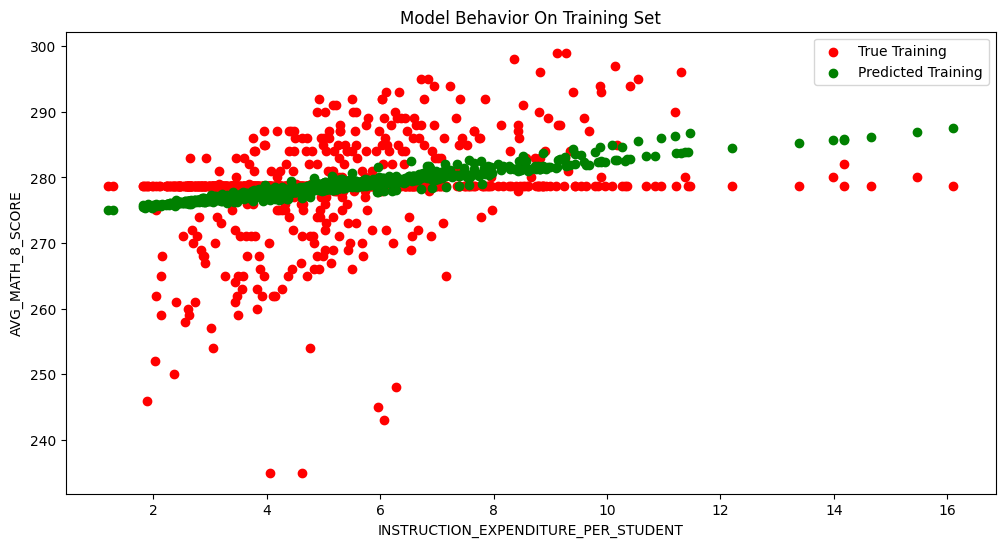

In [81]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

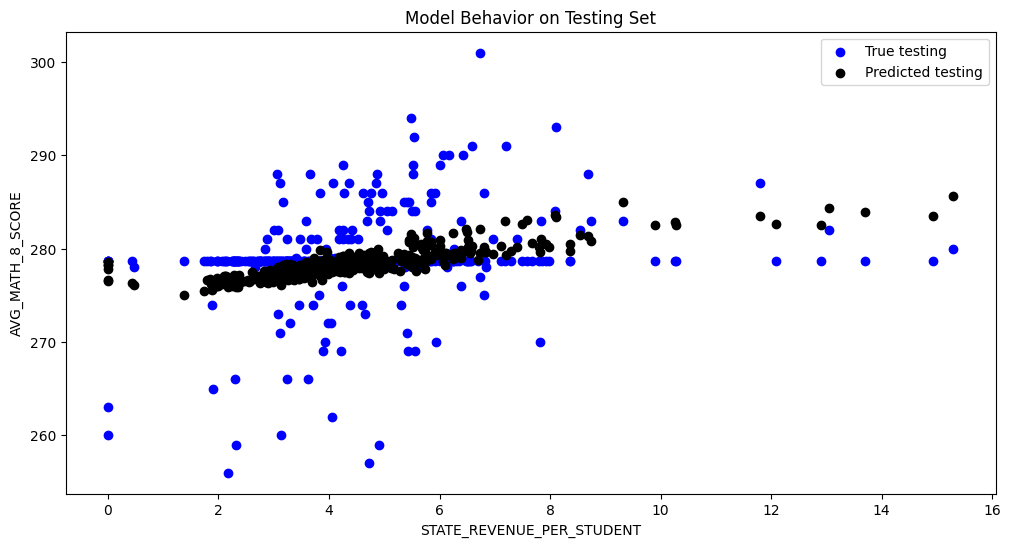

In [82]:
col_name = 'STATE_REVENUE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

    This project reinforced for me a lot of things that I knew about data science, as well as taught me a lot of new things. First off, with the little bit of data science experience I have from other clubs and my internship, I knew that I found data cleaning very tedious. This project, even though it was much smaller scale, felt kind of the same way, because I found myself getting frustrated with the puzzle of how to make the data workable. I also know from the little experience I have that my favorite parts of data science are exploring the data and trying to see what you can insights you can gain by working with it. For example, my favorite part was exploring the data to see which features might be most impactful on 8th grade math scores, and I think the reason for this is because my goal in data science has always been to use data to find answers to big questions that are hard to answer, like how to improve test scores. Exploring the data and seeing how different features affect the variable you're interested in is fascinating to me. My other favorite part was reading about the actual model. I know how a least squares regression line works from stats, but reading about its implementation was really cool, and I hope to spend time in MDST learning about all sorts of differnet models and their implementations, because the math and the code are very interesting to me.

    As for the actual results, it seems like our model is very inaccurate, and I'm not too surprised by this since the variables we picked weren't super strongly correlated with the outcome variable, but it's still way worse than I thought. The R^2 score of .07 tells us that the line barely fits the data, and the mean absolute error of almost 3 tells us that many of our predictions were way off. After my exploratory analysis, I got my hopes up and was wondering if it would turn out that increasing state taxes was a more effective way to improve education than federal or local taxes, or that we would find that support service expenditure was more important than other expenditures, but the model appears to say that neither is really that helpful. I wish I had time to dig more into this and see if the issue is that the data simply isn't there to support those hypotheses or that I messed up my implementation somehow, but unfortunately I've been super busy recently because of some family emergencies, so hopefully next week I'll be able to come back to this or I'll be able to talk to someone at the meetings to see if they got similar results. 